In [1]:
# Calculando a taxa de retorno de uma carteira com 4 ações de pesos iguais no portfólio

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [3]:
tickers = ['VALE3.SA', 'PETR3.SA', 'ITUB4.SA', 'BBDC4.SA']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2008-1-1')['Adj Close']

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3113 entries, 2008-01-02 to 2020-08-07
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   VALE3.SA  3113 non-null   float64
 1   PETR3.SA  3113 non-null   float64
 2   ITUB4.SA  3103 non-null   float64
 3   BBDC4.SA  3060 non-null   float64
dtypes: float64(4)
memory usage: 121.6 KB


In [5]:
mydata.head()

,VALE3.SA,PETR3.SA,ITUB4.SA,BBDC4.SA
Date,,,,
2008-01-02,37.486767,44.862873,9.743082,12.492139
2008-01-03,37.681004,44.213436,9.559474,12.244581
2008-01-04,36.321369,41.589870,9.626669,12.100735
2008-01-07,35.673927,40.161964,9.626669,12.324827
2008-01-08,36.386116,42.579086,9.716247,12.513503


In [6]:
mydata.tail()

,VALE3.SA,PETR3.SA,ITUB4.SA,BBDC4.SA
Date,,,,
2020-08-03,60.259998,22.340000,27.280001,22.181026
2020-08-04,60.700001,22.309999,25.690001,21.719999
2020-08-05,62.189999,23.750000,25.670000,21.820000
2020-08-06,61.830002,23.830000,26.030001,21.969999
2020-08-07,60.450001,23.309999,25.480000,21.840000


In [7]:
mydata.iloc[0]

VALE3.SA    37.486767
PETR3.SA    44.862873
ITUB4.SA     9.743082
BBDC4.SA    12.492139
Name: 2008-01-02 00:00:00, dtype: float64

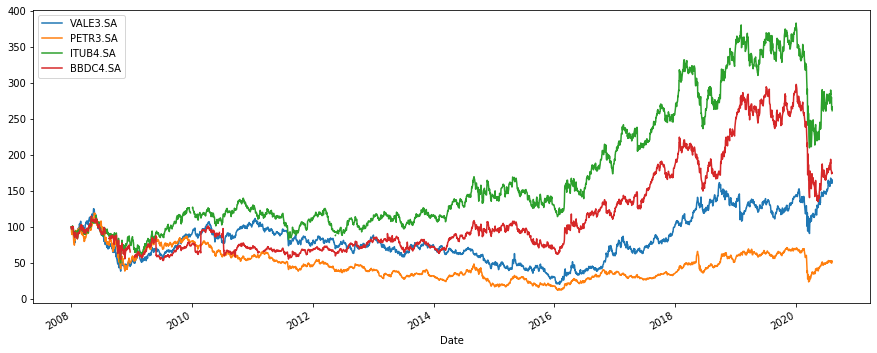

In [8]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

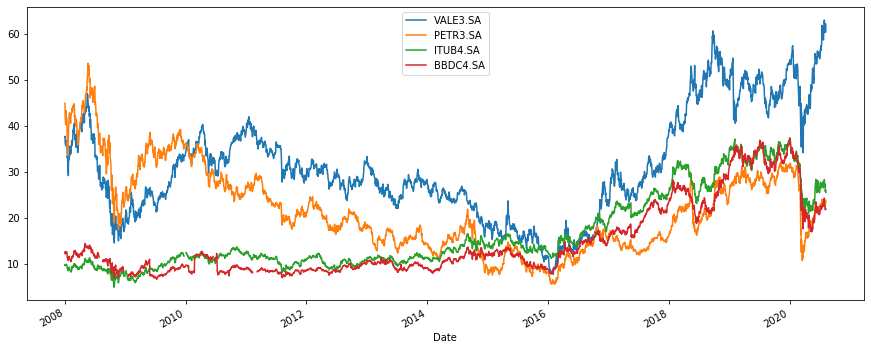

In [9]:
mydata.plot(figsize=(15,6))
plt.show()

In [10]:
mydata.loc['2008-01-02']

VALE3.SA    37.486767
PETR3.SA    44.862873
ITUB4.SA     9.743082
BBDC4.SA    12.492139
Name: 2008-01-02 00:00:00, dtype: float64

In [11]:
mydata.iloc[0]

VALE3.SA    37.486767
PETR3.SA    44.862873
ITUB4.SA     9.743082
BBDC4.SA    12.492139
Name: 2008-01-02 00:00:00, dtype: float64

In [12]:
# Calculando a taxa de retorno simples do portfolio

In [13]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,VALE3.SA,PETR3.SA,ITUB4.SA,BBDC4.SA
Date,,,,
2008-01-02,NaN,NaN,NaN,NaN
2008-01-03,0.005181,-0.014476,-0.018845,-0.019817
2008-01-04,-0.036083,-0.059339,0.007029,-0.011748
2008-01-07,-0.017825,-0.034333,0.000000,0.018519
2008-01-08,0.019964,0.060184,0.009305,0.015309


In [14]:
# Atribuindo os pesos
weights = np.array([0.25,0.25,0.25,0.25])

In [15]:
# Produto do vetor
np.dot(returns, weights)

array([        nan, -0.01198915, -0.02503501, ...,  0.02322938,
        0.00461959, -0.01779679])

In [16]:
# Retorno médio anual
annual_returns = returns.mean() * 250
annual_returns

VALE3.SA    0.141544
PETR3.SA    0.066512
ITUB4.SA    0.137451
BBDC4.SA    0.154000
dtype: float64

In [17]:
# Produto
np.dot(annual_returns, weights)

0.12487696787593489

In [18]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
pfolio_1

'12.488000000000001 %'

In [19]:
# Alterando os pesos da carteira para comparar
weights_2 = np.array([0.3,0.2,0.3,0.2])

In [20]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'

In [21]:
pfolio_1

'12.488000000000001 %'

In [22]:
pfolio_2

'12.78 %'